## 1. Load the dataset

In [1]:
# import library 

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset

diabetes_data=pd.read_csv('diabetes.csv')

## 2. Understand the dataset

### 2.1 Overview of data

In [3]:
# To show the top 5 rows of dataset

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It shows that there are eight independent variables (Pregnancies,Glucose,Blood Pressure , SkinThickness ,Insulin, BMI, DiabetesPedigreeFunction, Age) and one dependent variable (Outcome).

In [4]:
# To show the last 5 rows of dataset

diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# To show the detailed summary 

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [6]:
# To get the basic statistical summary of data

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# To get the shape of the dataset

diabetes_data.shape

(768, 9)

### 2.2 Handling Missing Values

In [8]:
# To check the missing values in the dataset

diabetes_data.isnull().values.any()

False

It shows that there are no null values (missing values) in the dataset. But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.
 

In [9]:
#Replace 0 to NaN

d=diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [10]:
# Find the number of Missing values

d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Handling the Missing values by replacing NaN to mean

In [11]:
#Replace NaN to mean value to explore dataset

diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].mean(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].mean(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(),inplace=True)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## 3. Plotting Various Graphs to explore dataset

### 'Outcome' Anaysis

In [12]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person

diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

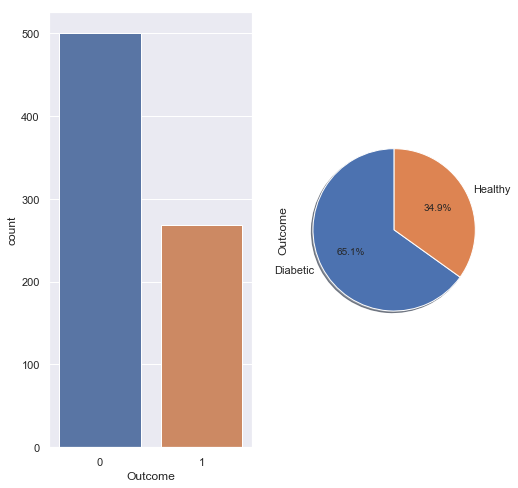

In [13]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(diabetes_data['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

diabetes_data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

The first plot shows the count values of the outcome and second pieplot shows that 65.1% people are diabetic and 34.9% people are Healthy..

### Different plots to analyse the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013665AC1C18>,
      dtype=object)

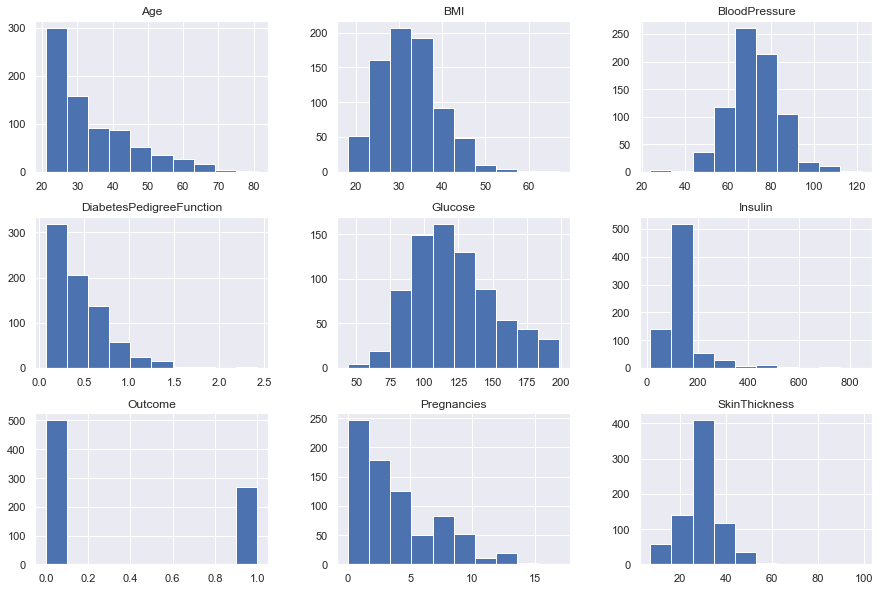

In [14]:
# Histogram 

diabetes_data.hist(figsize=(15,10))

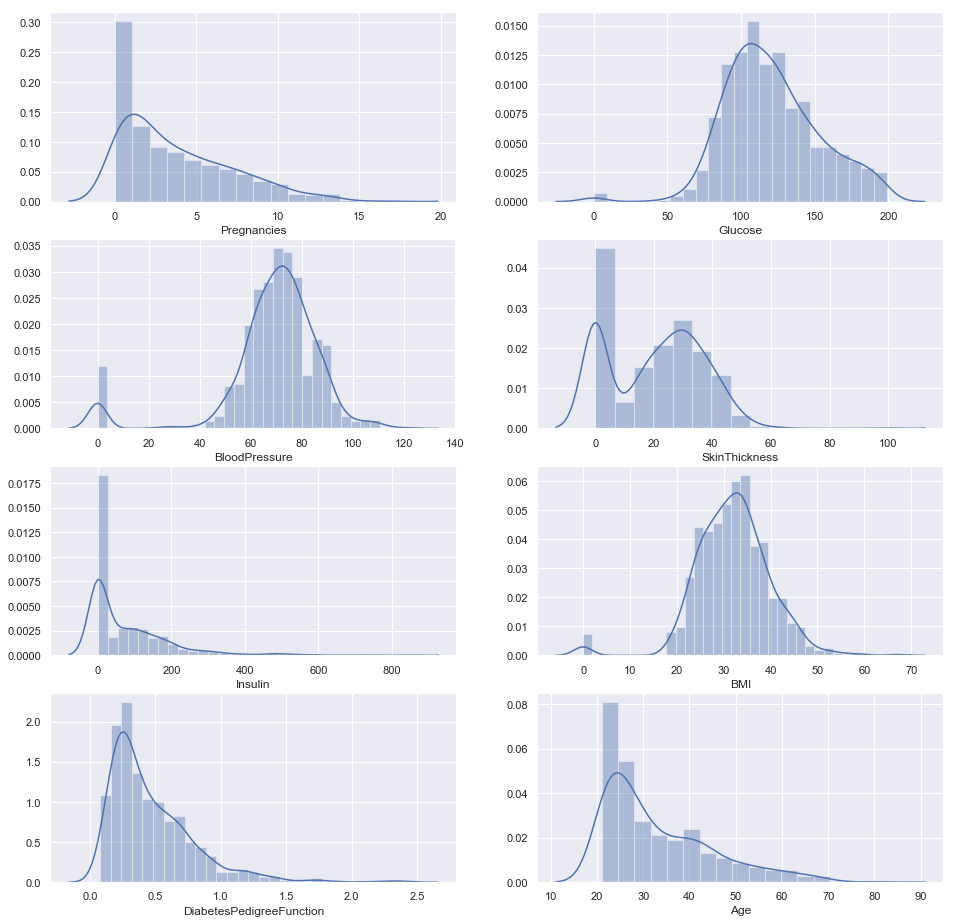

In [35]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1])
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0])
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1])
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(diabetes_data['Age'],ax=ax2[3][1])



The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

### Outliers

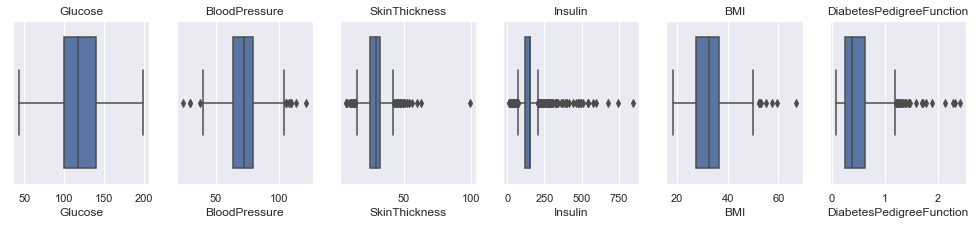

In [16]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetes_data.columns[i])
    sns.boxplot(diabetes_data[diabetes_data.columns[i]])

We have replaced the '0' value to mean of the parameters. The plot shows outliers present in the dataset.

BloodPressure,SkinThickness,Insulin,BMI have outliers.It is clearly visible in the boxplots.

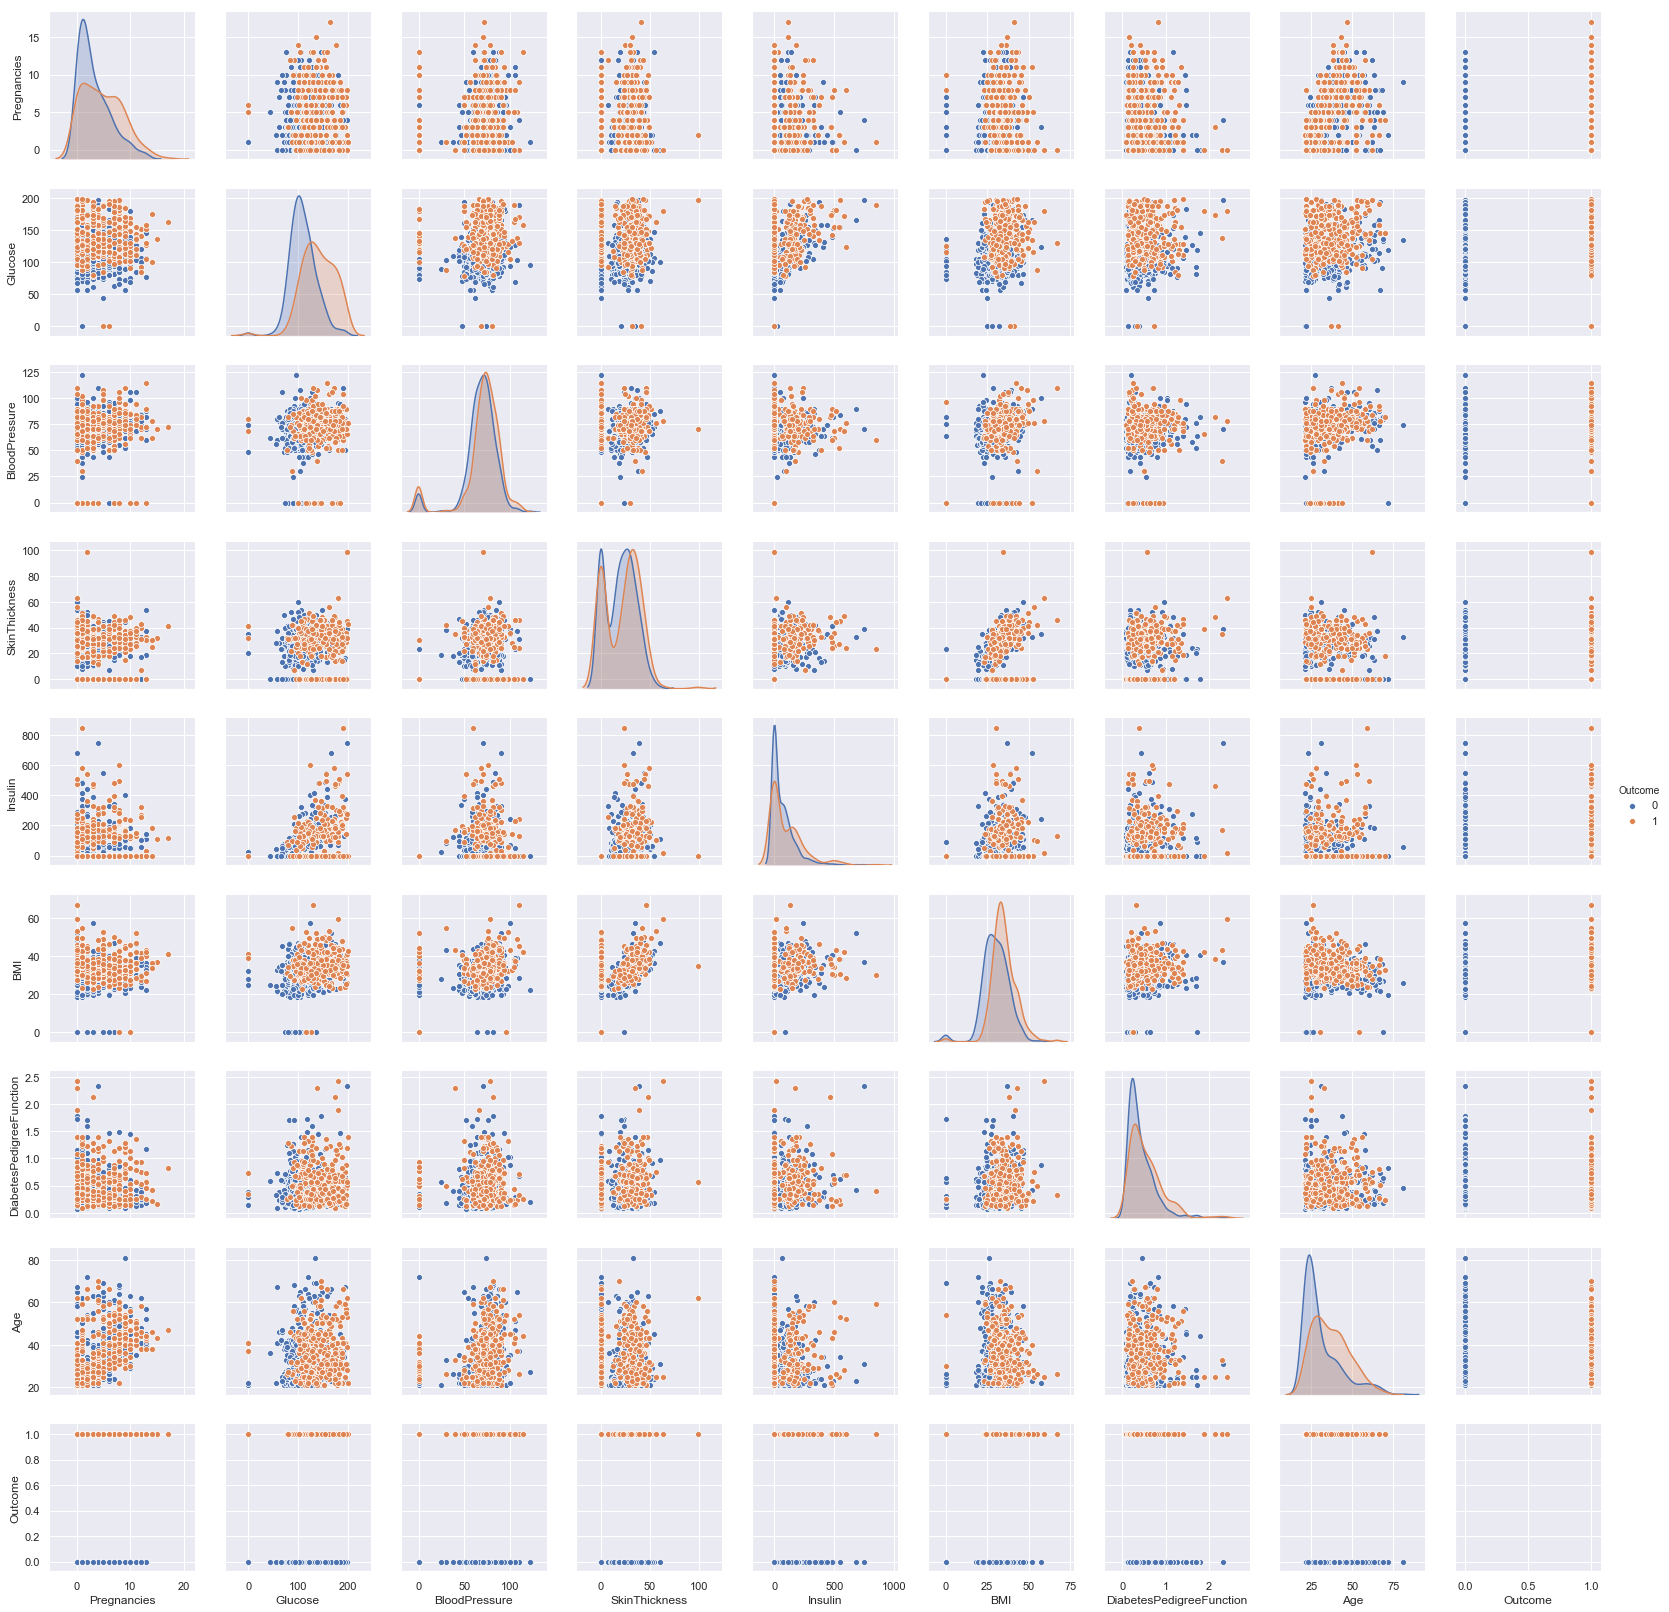

In [36]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(diabetes_data,hue='Outcome')

The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,

* Pregnancies and age have some kind of a linear line. 

* BloodPressure and age have little relation. Most of the aged people have BloodPressure.

* Insulin and Glucose have some relation.


In [18]:
# corrlation matrix 

cor=diabetes_data.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


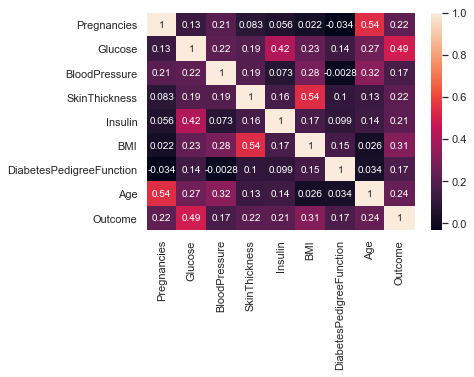

In [19]:
# correlation plot---heatmap

sns.heatmap(cor,annot=True)

The correlation plot shows the relation between the parameters.

* Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.

* Insulin and DiabetesPedigreeFunction have little correlation with the outcome.

* BloodPressure and SkinThickness have tiny correlation with the outcome.

* There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose.

Now we will analyse the parameter versus Outcome.

### Analysis of 'Age' parameter

In [20]:
#Analysis of Age parameter

a=pd.Series([])
for i in diabetes_data.index:
    if(diabetes_data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(diabetes_data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(diabetes_data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(diabetes_data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
diabetes_data['Age']=a
diabetes_data.head()

#Find the number of diabetic person in each age group

data1=diabetes_data[diabetes_data['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

,Outcome
Age,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [21]:
# Percentage of diabetic Person in each age group

data2=diabetes_data.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


It shows that 48% people are Diabetic in the age group of 31-40  and 59% people diabetic in the age group of 41-55.It depicts that the percentage of diabetic people in these age group is higher than the other age group.  

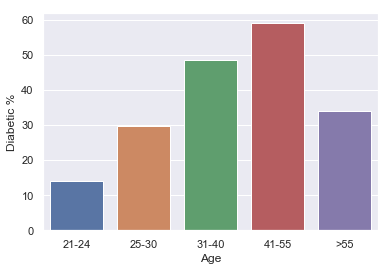

In [22]:
#4.1 barplot

sns.barplot(data1.index,data1['Diabetic %'])

It is evident from the barplot that percentage of women diagnosed with diabetic are in the age group between '31-55'. It means that the middle aged women are most likely to be diabetic than young or old women.

### Analysis of 'Pregnancies' parameter

In [23]:
#6.Crosstab gives the fregency table information ----Pregnancies

pd.crosstab(diabetes_data['Pregnancies'],diabetes_data['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


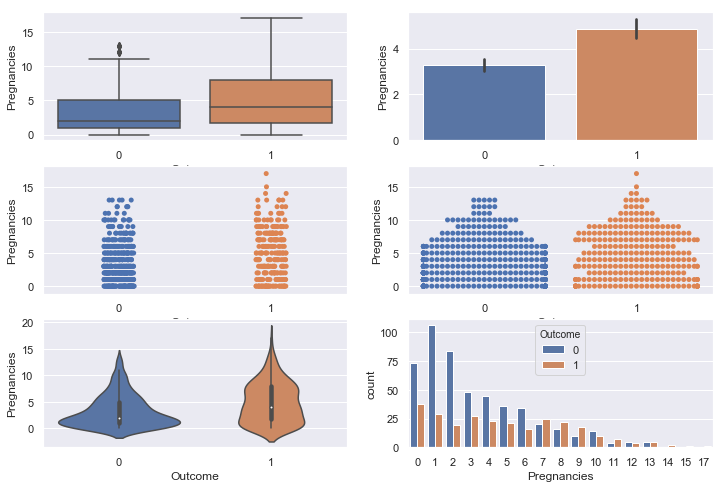

In [24]:
# Categorical vs Continuous ----Outcome vs Pregnancies

fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['Pregnancies'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['Pregnancies'], ax=ax2[1][1])
sns.violinplot(diabetes_data['Outcome'], diabetes_data['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=diabetes_data,ax=ax2[2][1])

The plots show that pregnant people have more chance of daiabeties.

### Analysis of 'Glucose' parameter

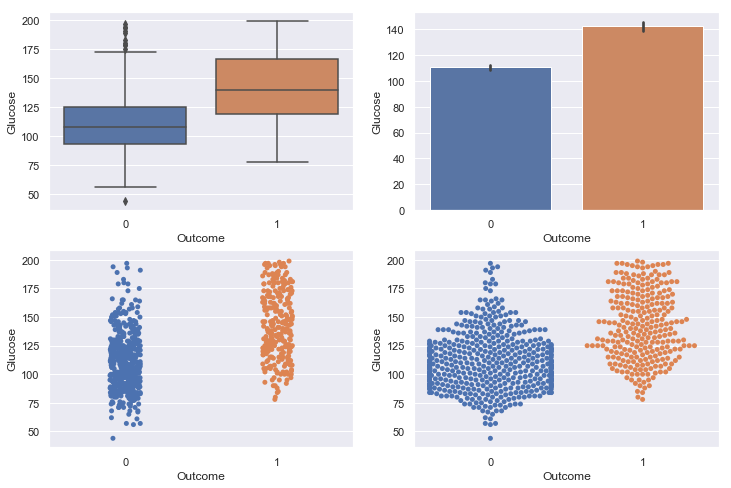

In [25]:
# Categorical vs Continuous ---- Outcome vs Glucose 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['Glucose'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['Glucose'], ax=ax2[1][1])

The plot shows that if Glucose level is high then people are more likely to have diabeties. 

### Analysis of 'BloodPressure' parameter

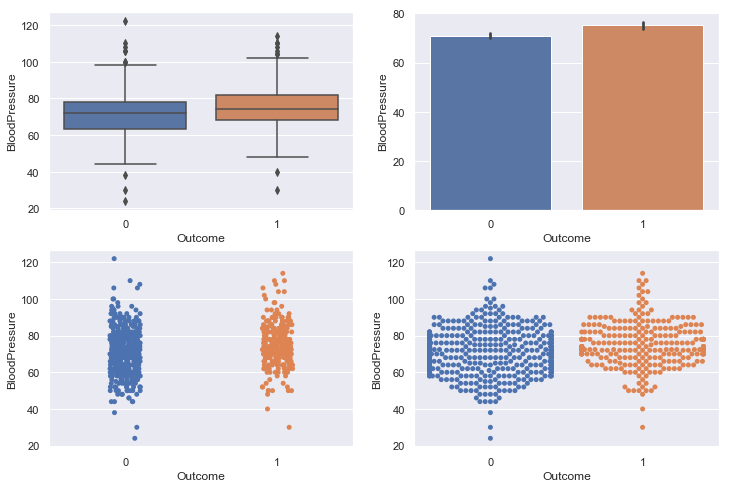

In [26]:
# Categorical vs Continuous ---- Outcome vs BloodPressure

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['BloodPressure'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['BloodPressure'], ax=ax2[1][1])

The plots show that people with high BloodPressure have more chance of daiabeties.

### Analysis of 'SkinThickness' parameter

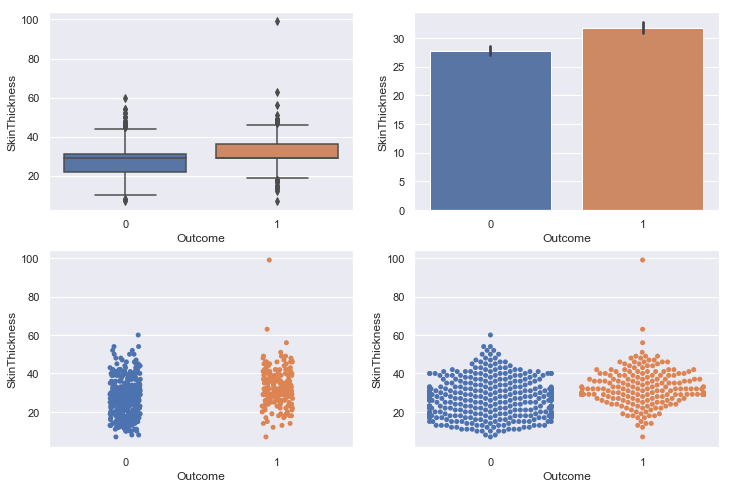

In [27]:
# Categorical vs Continuous ----Outcome vs SkinThickness  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['SkinThickness'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['SkinThickness'], ax=ax2[1][1])

### Analysis of 'Insulin' parameter

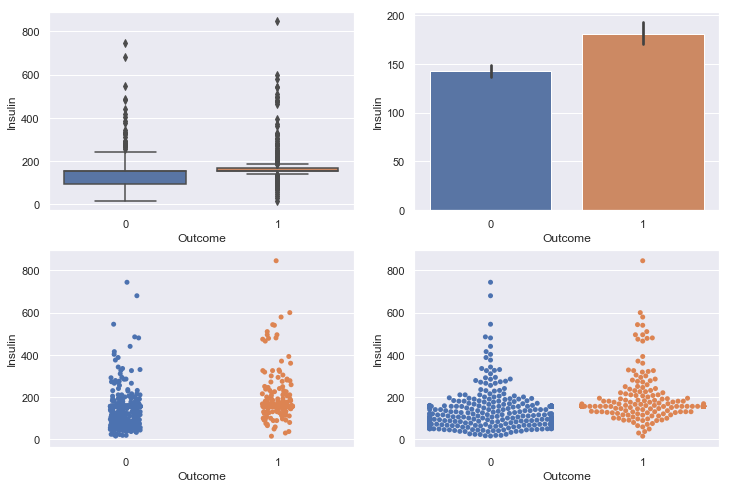

In [28]:
# Categorical vs Continuous ----Outcome vs Insulin  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['Insulin'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['Insulin'], ax=ax2[1][1])

The plot shows that people with high Insulin level are more likely to have Diabetes.

### Analysis of 'BMI' parameter

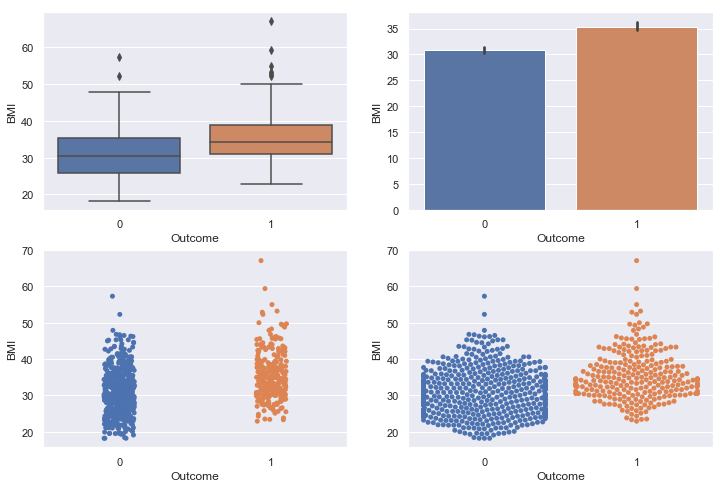

In [29]:
# Categorical vs Continuous ----Outcome vs BMI

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['BMI'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['BMI'], ax=ax2[1][1])

### Analysis of 'DiabetesPedigreeFunction' parameter

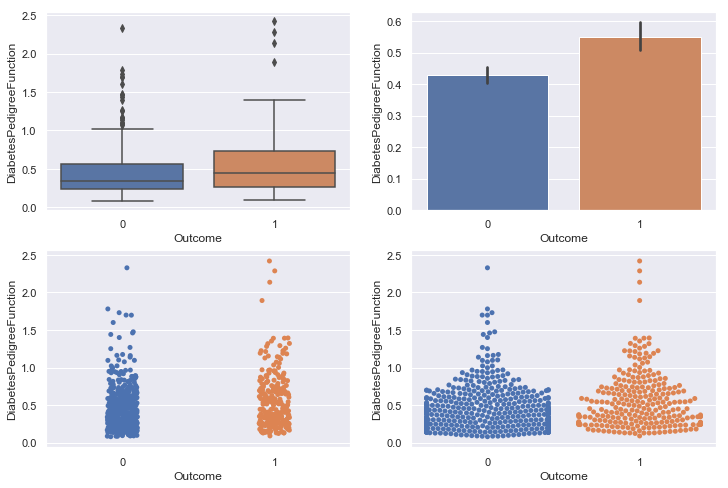

In [30]:
# Categorical vs Continuous ----Outcome vs DiabetesPedigreeFunction

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=diabetes_data,ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'], diabetes_data['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(diabetes_data['Outcome'], diabetes_data['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes_data['Outcome'], diabetes_data['DiabetesPedigreeFunction'], ax=ax2[1][1])

### Analysis of 'Age' and 'Pregnancies'

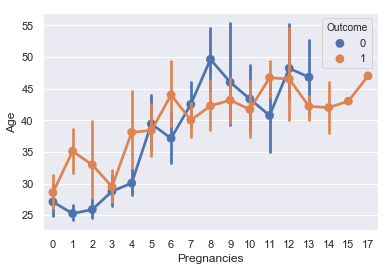

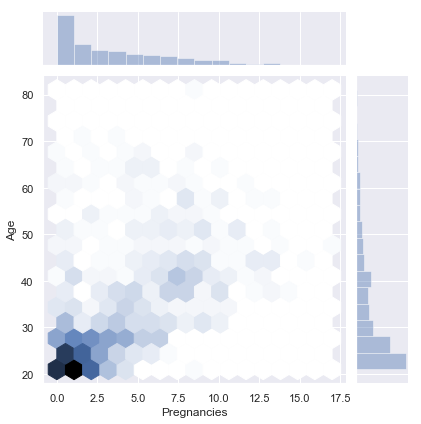

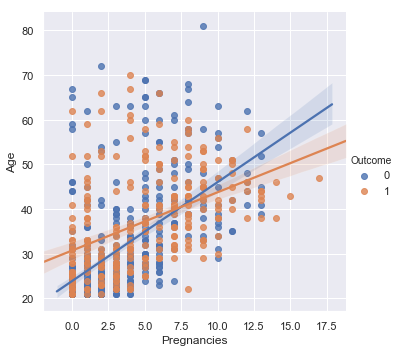

In [31]:
# lmplot---linear Regression plots
diabetes_data=pd.read_csv('diabetes.csv')


sns.pointplot(diabetes_data['Pregnancies'], diabetes_data['Age'], hue=diabetes_data['Outcome'])
sns.jointplot(diabetes_data['Pregnancies'], diabetes_data['Age'], kind='hex')
sns.lmplot(x='Pregnancies',y='Age',data=diabetes_data,hue='Outcome')


### Analysis of 'Insulin' and 'SkinThickness'

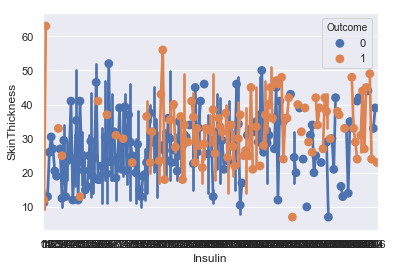

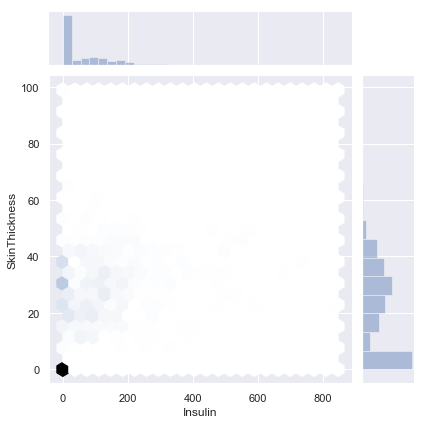

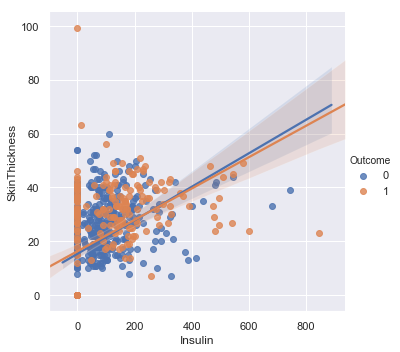

In [32]:
sns.pointplot(diabetes_data['Insulin'], diabetes_data['SkinThickness'], hue=diabetes_data['Outcome'])
sns.jointplot(diabetes_data['Insulin'], diabetes_data['SkinThickness'], kind='hex')
sns.lmplot(x='Insulin',y='SkinThickness',data=diabetes_data,hue='Outcome')


### Analysis of BMI and SkinThickness

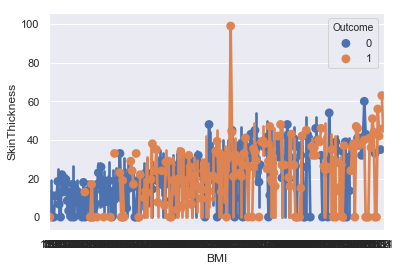

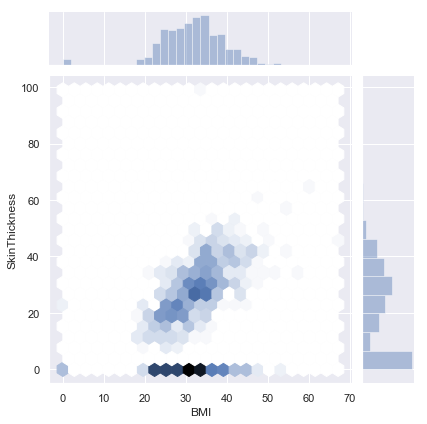

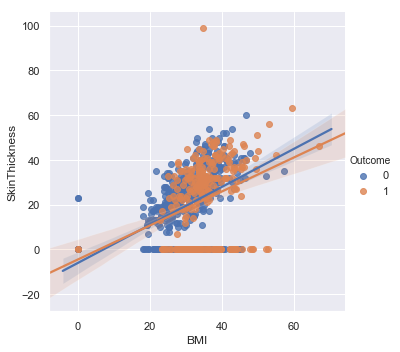

In [33]:
sns.pointplot(diabetes_data['BMI'], diabetes_data['SkinThickness'], hue=diabetes_data['Outcome'])
sns.jointplot(diabetes_data['BMI'], diabetes_data['SkinThickness'], kind='hex')
sns.lmplot(x='BMI',y='SkinThickness',data=diabetes_data,hue='Outcome')


### Analysis of Insulin and Glucose

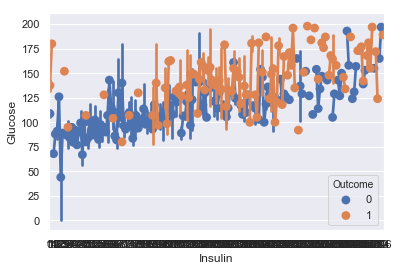

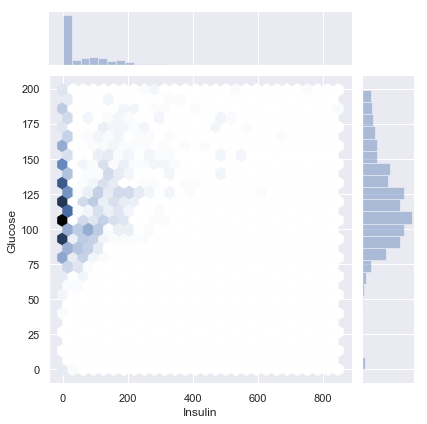

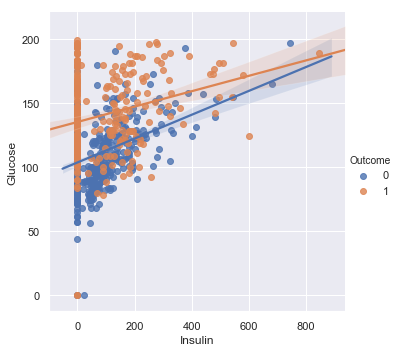

In [34]:
sns.pointplot(diabetes_data['Insulin'], diabetes_data['Glucose'], hue=diabetes_data['Outcome'])
sns.jointplot(diabetes_data['Insulin'], diabetes_data['Glucose'], kind='hex')
sns.lmplot(x='Insulin',y='Glucose',data=diabetes_data,hue='Outcome')

## 4. Insights from the Dataset

1. The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).

2. BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.

3. The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.

4. The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.

5. The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.

6. The missing values '0' is replaced by the mean of the parameter to explore the dataset. 

7. BloodPressure,SkinThickness,Insulin,BMI have outliers.

8. There are no convincing relationship between the parameters.Pregnancies and age have some kind of a linear line. BloodPressure and age have little relation. Most of the aged people have BloodPressure.Insulin and Glucose have some relation.

9. Glucose, Age BMI and Pregnancies are the most Correlated features with the Outcome.Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome.

10. Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose are little correlated.

11. The midle aged women are most likely to be diabetic than the young women. As the percentage of diabetic women are 48% and 59% in the age group of 31-40  and 41-55.

12. After Pregnancy people have more chance of diabeties.

13. People with high Glucose level are more likely to have diabeties.

14. People with high BloodPressure have more chance of diabeties.

15. People with high Insulin level are more likely to have Diabetes.